# Color Analysis Examples
* __Parametric Difference Equation imaging methods__ _in the context of the Escape Time Algorithm_
    * grayscale
    * map directly to HSV
    * color-map to RGB
    
#### Equation Definition Code:

In [29]:
""" get the external code files"""
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

""" known parameter sets  """
satsty_47 = [0.340859990388, 0.269282250320, -0.255017720861]
satsty_11 = [0.344619431962, 0.941645375918, 0.162717312944]
satsty_14 = [0.193407301266, 0.026479381065, -0.243042579435]
# ststy_16=[;0.066891434145;-0.503096947497;0.653234727471]
# ststy_18 = [;0.193065939964;-0.430515636200;-0.615403821966]
# ststy_19 = [;1.320777182677;-0.452201790095;-0.611669189006]
# ststy_24 = [;1.459972075390;-0.624292474411;0.078557394437]
# ststy_4 = [;1.068184773761;0.083391695274;-0.852613722861]
# ststy_44 = [;0.428223432677;-0.589254410808;0.200984799937]
# ststy_46 = [;0.034235460773;-0.264950204336;0.270555890460]
# ststy_50 = [;-0.001431961068;-0.044761563627;-0.127490944825]
# ststy_51 = [;-0.437106067189;0.211463969904;-0.066699640972]
# ststy_62 = [;0.498412074717;0.038267087614;-0.933368392873]
# ststy_64 = [;-0.132397456571;0.002361109438;-0.019705090640]
# ststy_65 = [;-0.252696256811;-0.578916060315;0.355213658376]
# ststy_69 = [;0.442505748552;0.570430992332;0.201608074562]
# ststy_7 = [;0.409598584976;-0.117283883400;-0.815798943954]
# ststy_70 = [;0.095504302159;-0.346813306787;0.005518101755]
# ststy_71 = [;-0.552793186747;0.953986699489;-0.082705789277]
# ststy_74 = [;-0.052367222250;0.773659478775;0.084917023083]
# ststy_82 = [;0.333189142040;-0.173180822238;-0.132020922546]
# ststy_85 = [;0.288747284548;0.376558293481;-0.083492460184]
# ststy_88 = [;0.800567736093;0.366279632372;0.277873610780]
# ststy_93 = [;-1.156168573383;0.690357724948;0.695351484812]
# ststy_95 = [;-0.244555335048;-0.201202442533;0.699841322481]
""" define the equation """
def RoyalZ(Z, p, Z0=None, ET=None):
    """ 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    nc = len(p)
    for n in range(0, nc):
        Z = Z**(-1*np.exp(Z*p[n]))
    return Z

In [30]:
# MATLAB equivalent
#     for n = 1:nc
#         Z = Z^(-1^n*exp(Z*c(n)));
#     end

Z = 1 + 1j
print(Z)
p = satsty_47 = [0.340859990388, 0.269282250320, -0.255017720861]
nc = len(p)
for n in range(0, nc):
    Z = Z**(-1*np.exp(Z*p[n]))
    print(Z)
# MATLAB:
#    1.0000 + 1.0000i
#    0.3279 - 0.8530i
#    0.4569 + 1.4126i
#    0.2923 - 0.3869i

(1+1j)
(0.327922808751-0.852974062233j)
(0.456927290484+1.4126334442j)
(0.292314839075-0.386878448546j)


# Products of Escape Time Algorithm
* ET, Z, Z0 = get_primitives( [ (function-name, function-parameters ) ], complex_plane_definition)
    * Z0  = initial complex vector at each point (on the complex plane == the input image)
    * ET  = Escape Time at each point
    * Z   = final complex vector at each point

In [45]:
""" Define a complex plane point for each pixel """
par_set = {'n_rows': 500, 'n_cols': 700}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = 0 # 
par_set['zoom'] = 1/3

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

""" Define the function handle and numerical parameter set """
list_tuple = [(RoyalZ, (satsty_47))]
t0 = time.time()

""" Get the primitive products of the calculation """
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t calculate primitives total time')

56.195502042770386 	 calculate primitives total time


# Normalized number planes for use as image color values
* Zd, Zr, ETn = etg_norm(Z0, Z, ET)
    * Zd  = distance at ET
    * Zr  = rotation at ET
    * ETn = ET

In [46]:
""" Normalize """
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print(time.time() - t0, '\t normalize primitives to color values')

0.818289041519165 	 normalize primitives to color values


# Grayscale
* D = mat_to_gray(Zd, max_v=255, min_v=64)
    * normalized number plane
    * (optional) grascale parameters

2.0164120197296143 	 grayscale converstion time


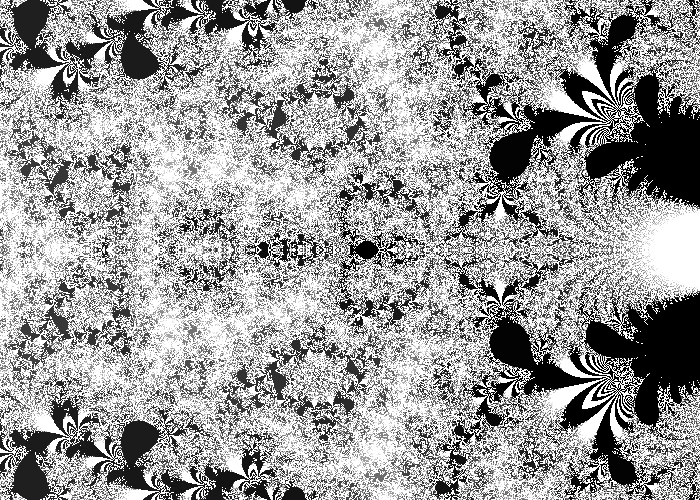

In [47]:
""" Number of iterations for each Vector at Escape Time as a full range grayscale  """
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print(time.time() - t0, '\t grayscale converstion time')
display(ETd)

1.979227066040039 	 grayscale converstion time


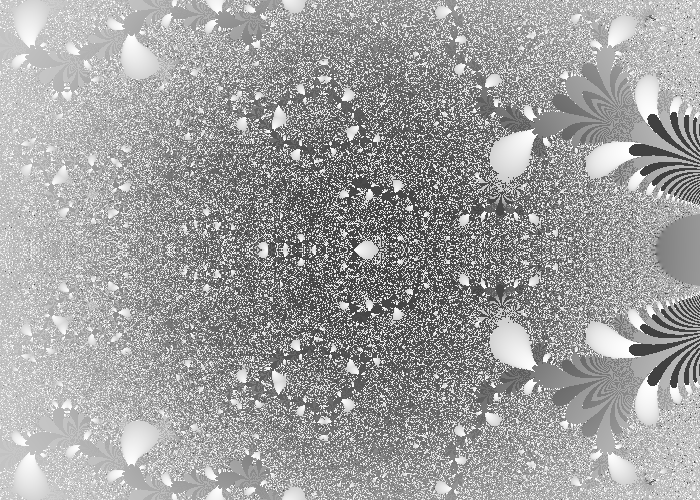

In [48]:
""" Vector Distance at Escape Time as a full range grayscale  """
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(D)

2.2277910709381104 	 grayscale converstion time


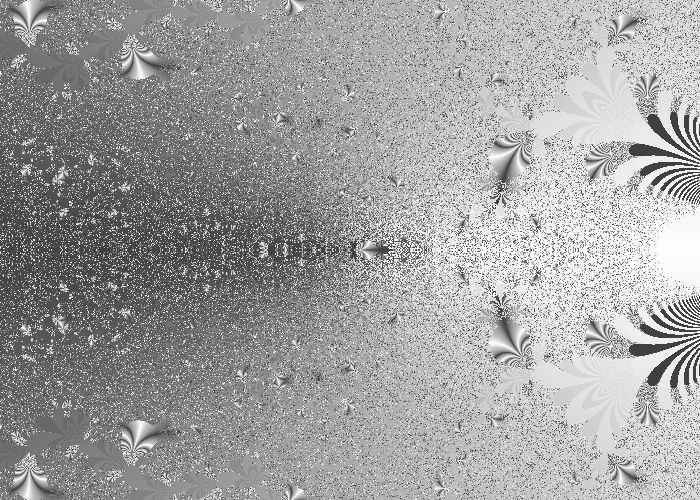

In [49]:
""" Vector Rotation at Escape Time as a full range grayscale  """
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(R)

# Hue Saturation Value: HSV direct
* Ihsv = rgb_2_hsv_mat(H, S, V)
    * H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
    * S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
    * V = ncp.range_norm(ETn, lo=0.0, hi=1.0)

4.493069171905518 	 HSV converstion time


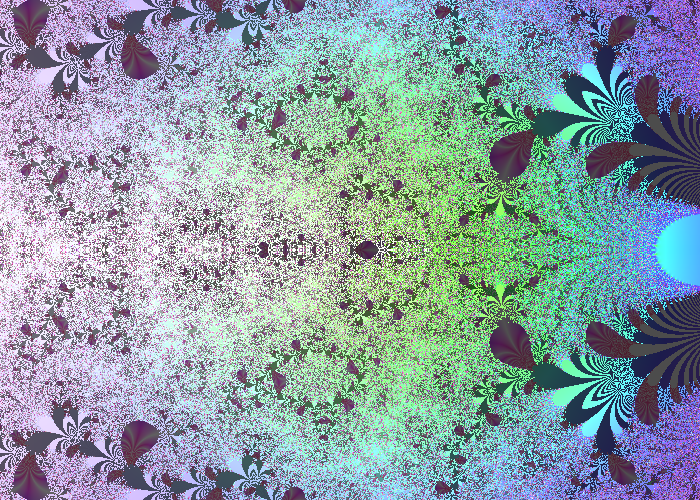

In [50]:
""" number one of two functions 
    (both examples using Distance, Rotation and ET as H,S,V) """
t0 = time.time()
H = ncp.range_norm(Zd_sm, lo=0.25, hi=0.95)
S = ncp.range_norm(Zr_sm, lo=0.0, hi=0.7)
V = ncp.range_norm(ETn_sm, lo=0.3, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print(time.time() - t0, '\t HSV converstion time')
display(Ihsv)

5.228718042373657 	 HSV converstion time


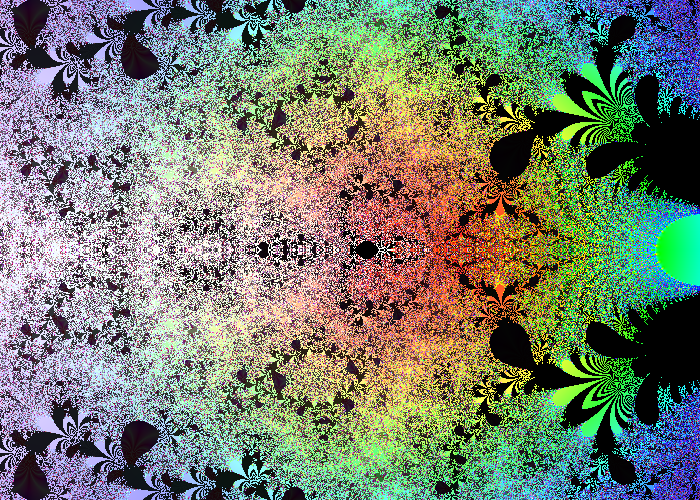

In [51]:
""" number 2 of two functions
    (using using Distance, Rotation and ET as full range H, S, V) """
t0 = time.time()
H2 = ncp.range_norm(Zd_sm)
S2 = ncp.range_norm(Zr_sm)
V2 = ncp.range_norm(ETn_sm)
I_hsv2 = ncp.normat_hsv_intrgb(H2, S2, V2, H_max=1.0, H_min=0.0, S_max=1.0, S_min=0.0, V_max=1.0, V_min=0.0)
print(time.time() - t0, '\t HSV converstion time')
display(I_hsv2)

# Color-mapped
* I_mapped = mat_to_mapped(Zd, mp)
    * Zd converted to index of unique values
    * mp will be resized to number of unique values in Zd

1.7729430198669434 	 HSV converstion time


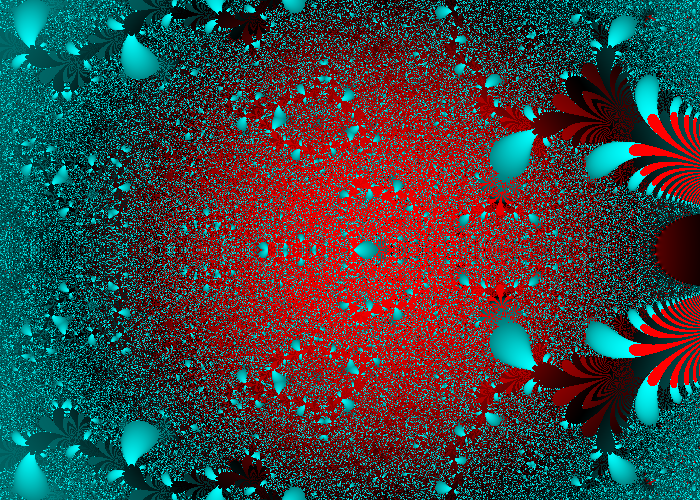

In [ ]:
""" Color map example: Red to Black to Blue-Green """
t0 = time.time()
mp = np.array([[1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 1.0, 1.0]])
I_rgb = ncp.mat_to_mapped(Zd_sm, mp)
print(time.time() - t0, '\t HSV converstion time')
display(I_rgb)

## Interesting numerical factoid section:

ET =	 2


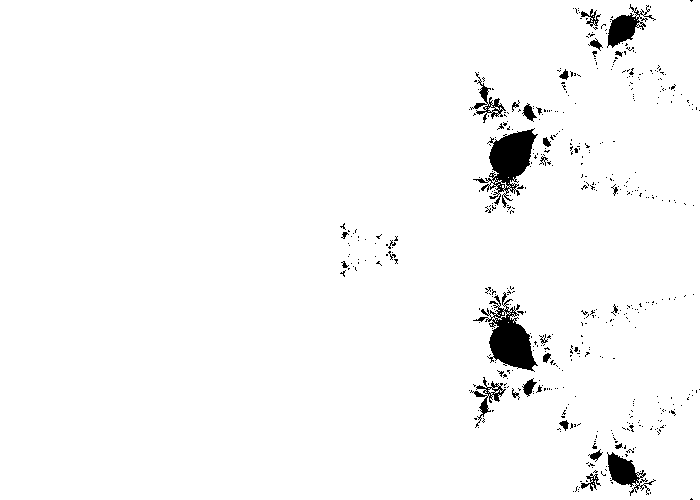

ET =	 3


In [ ]:
"""  Time-Point of Escape individual escape time points for each escape time
     Animations possible  """
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [ ]:
"""  number of points escaped at each iteration: escape time frequency  """
Total_Points = ET_sm.shape[0] * ET_sm.shape[1]
print('\t\t%i remain in orbit after %i iterations\n'%((ET_sm > (ET_sm.max()-1)).sum(),  ET_sm.max()))
print('%3s) %10s\n'%('ET', 'Escaped'))
t_esc = 0
for k in range(1,int(ET_sm.max())):
    print('%3i) %7i'%(k, (ET_sm == k).sum()))
    t_esc += (ET_sm == k).sum()

print('\n(in)Sanity check:\n%i Total points\n%i Escaped\n%i Remain'%(Total_Points, t_esc, Total_Points - t_esc))

In [ ]:
""" partial list of unescaped starting points (look for orbit points) """
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))